In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [2]:
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.7.1+cpu
0.22.1+cpu


In [3]:
#Getting a datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,

    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
train_data.classes, train_data.targets.shape, test_data.data.shape, test_data.targets.shape

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

Image Shape:torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

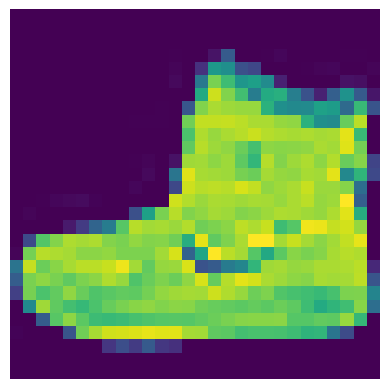

In [6]:
import matplotlib.pyplot as plt
image , label=train_data[0]
print(f"Image Shape:{image.shape}")
plt.imshow(image.squeeze(0))
plt.axis(False)

      


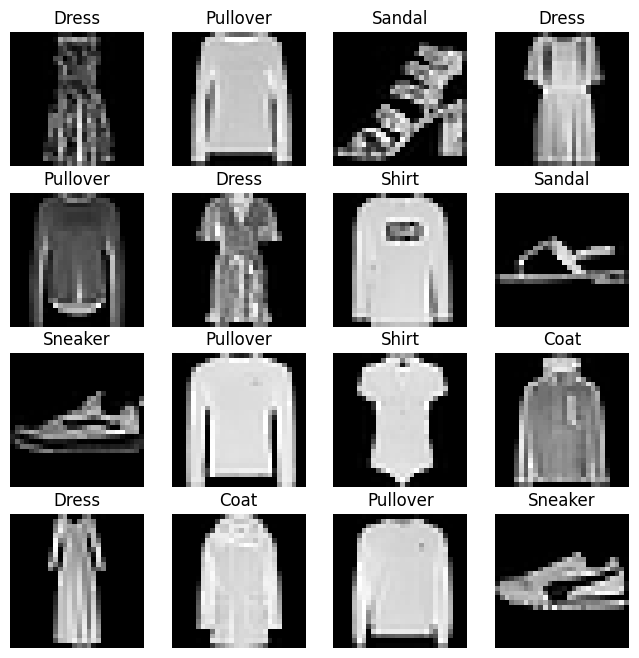

In [7]:
torch.manual_seed(34)
fig=plt.figure(figsize=(8,8))
rows,cols=4,4
class_names=train_data.classes
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(0),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)
print(f"Number of batches in train dataloader: {len(train_dataloader)}")
print(f"Number of test dataloader {len(test_dataloader)}")

Number of batches in train dataloader: 1875
Number of test dataloader 313


Starting with a baseline model 

In [ ]:
# Get one batch from the train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

flatten_model = nn.Flatten()
x = train_features_batch[0]
output=flatten_model(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
output


Input shape: torch.Size([1, 28, 28])
Output shape: torch.Size([1, 784])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.4510, 0.4431, 0.3804, 0.2863, 0.2471, 0.4627, 0.3490, 0.2549, 0.3490,
         0.5020, 0.2235, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.5647, 0.4941, 0.4314, 0.2863, 0.2863, 0.4824, 0.3882, 0.3490,
         0.4000, 0.5020, 0.3686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.5765, 0.2980, 0.2863, 0.3294, 0.3059, 0.4627, 0.2745,
         0.3294, 0.2471, 0.4314, 0.4118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.5451, 0.3176, 0.3176, 0.3373, 0.3294, 0.3294,
         0.2667, 0.3490, 0.2745, 0.3804, 0.4824, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [27]:
from torch import nn 

class FashionMNISTMODELV0(nn.Module):
    def __init__(self, 
                  input_shape:int,
                  hidden_units:int,
                  output_shape:int):
         super().__init__()
         self.layer_stack=nn.Sequential(
             nn.Flatten(),
             nn.Linear(in_features=input_shape, out_features=hidden_units),
             nn.Linear(in_features=hidden_units, out_features=output_shape),
         )
    def forward(self,x):
        return self.layer_stack(x)

In [28]:
torch.manual_seed(42)
model_0=FashionMNISTMODELV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
    
).to("cpu")
print(model_0)

FashionMNISTMODELV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)
